# Make Figures for Main Manuscript

Lauren Khoury and Kendra Wyant  
October 16, 2025

In [ ]:

library(dplyr) |> suppressMessages()
library(skimr)
library(purrr)
library(ggplot2)
library(patchwork)
library(ggpattern)
library(forcats)
library(kableExtra, exclude = ("group_rows"))

theme_set(theme_classic())
method_colors <- c("No covariates" = "sienna",
                   "All covariates" = "goldenrod2",
                   "p-hacking" = "red2",
                   "Bivariate correlation" = "springgreen3",
                   "Partial correlation" = "deepskyblue",
                   "Full linear model" = "mediumpurple1",
                   "Full linear model with X" = "slateblue1",
                   "LASSO" = "hotpink",
                   "LASSO with X" = "lightpink")
method_linetypes <- c("No covariates" = "solid",
                      "All covariates" = "solid",
                      "p-hacking" = "dashed",
                      "Bivariate correlation" = "longdash",
                      "Partial correlation" = "twodash",
                      "Full linear model" = "longdash",
                      "Full linear model with X" = "twodash",
                      "LASSO" = "longdash",
                      "LASSO with X" = "twodash")

method_patterns <- c("No covariates" = "none",
                      "All covariates" = "none",
                      "p-hacking" = "crosshatch",
                      "Bivariate correlation" = "stripe",
                      "Partial correlation" = "circle",
                      "Full linear model" = "stripe",
                      "Full linear model with X" = "circle",
                      "LASSO" = "stripe",
                      "LASSO with X" = "circle")

devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true") |> suppressMessages()

rdrive_path <- format_path("cov/raw_data")

options(digits = 3)


In [ ]:

d_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_0.csv"))
d_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_03.csv"))
d_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_05.csv"))

d_20_covs <- data.table::fread(here::here(rdrive_path, "batch_results_20_covs.csv"))
d_n50 <- data.table::fread(here::here(rdrive_path, "batch_results_n50.csv"))

d2_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_0.csv"))
d2_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_03.csv"))
d2_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_05.csv"))

d_wo_x_og <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_og_seed.csv"))
d_wo_x_new <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_new_seed.csv"))


In [ ]:

d_0 <- rbind(d_0, d_20_covs |> filter(b_x == 0))
d_03 <- rbind(d_03, d_20_covs |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_20_covs |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d_n50 |> filter(b_x == 0))
d_03 <- rbind(d_03, d_n50 |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_n50 |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d2_0)
d_03 <- rbind(d_03, d2_03)
d_05 <- rbind(d_05, d2_05)

d_0 <- rbind(d_0, d_wo_x_og |> filter(b_x == 0))
d_0 <- rbind(d_0, d_wo_x_new |> filter(b_x == 0))
d_03 <- rbind(d_03, d_wo_x_og |> filter(b_x == 0.3))
d_03 <- rbind(d_03, d_wo_x_new |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_wo_x_og |> filter(b_x == 0.5))
d_05 <- rbind(d_05, d_wo_x_new |> filter(b_x == 0.5))


In [ ]:
rm(d_20_covs, d_n50, d2_0, d2_03, d2_05, d_wo_x_og, d_wo_x_new)


In [ ]:

d_0 <- d_0 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs", "p_hacked", "r", 
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c("No covariates", "All covariates", "p-hacking", 
                                    "Bivariate correlation", "Partial correlation", 
                                    "Full linear model", "Full linear model with X", 
                                            "LASSO", "LASSO with X")))

d_03 <- d_03 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs", "p_hacked", "r", 
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c("No covariates", "All covariates", "p-hacking", 
                                    "Bivariate correlation", "Partial correlation", 
                                    "Full linear model", "Full linear model with X", 
                                            "LASSO", "LASSO with X")))

d_05 <- d_05 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs", "p_hacked", "r", 
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c("No covariates", "All covariates", "p-hacking", 
                                    "Bivariate correlation", "Partial correlation", 
                                    "Full linear model", "Full linear model with X", 
                                            "LASSO", "LASSO with X")))


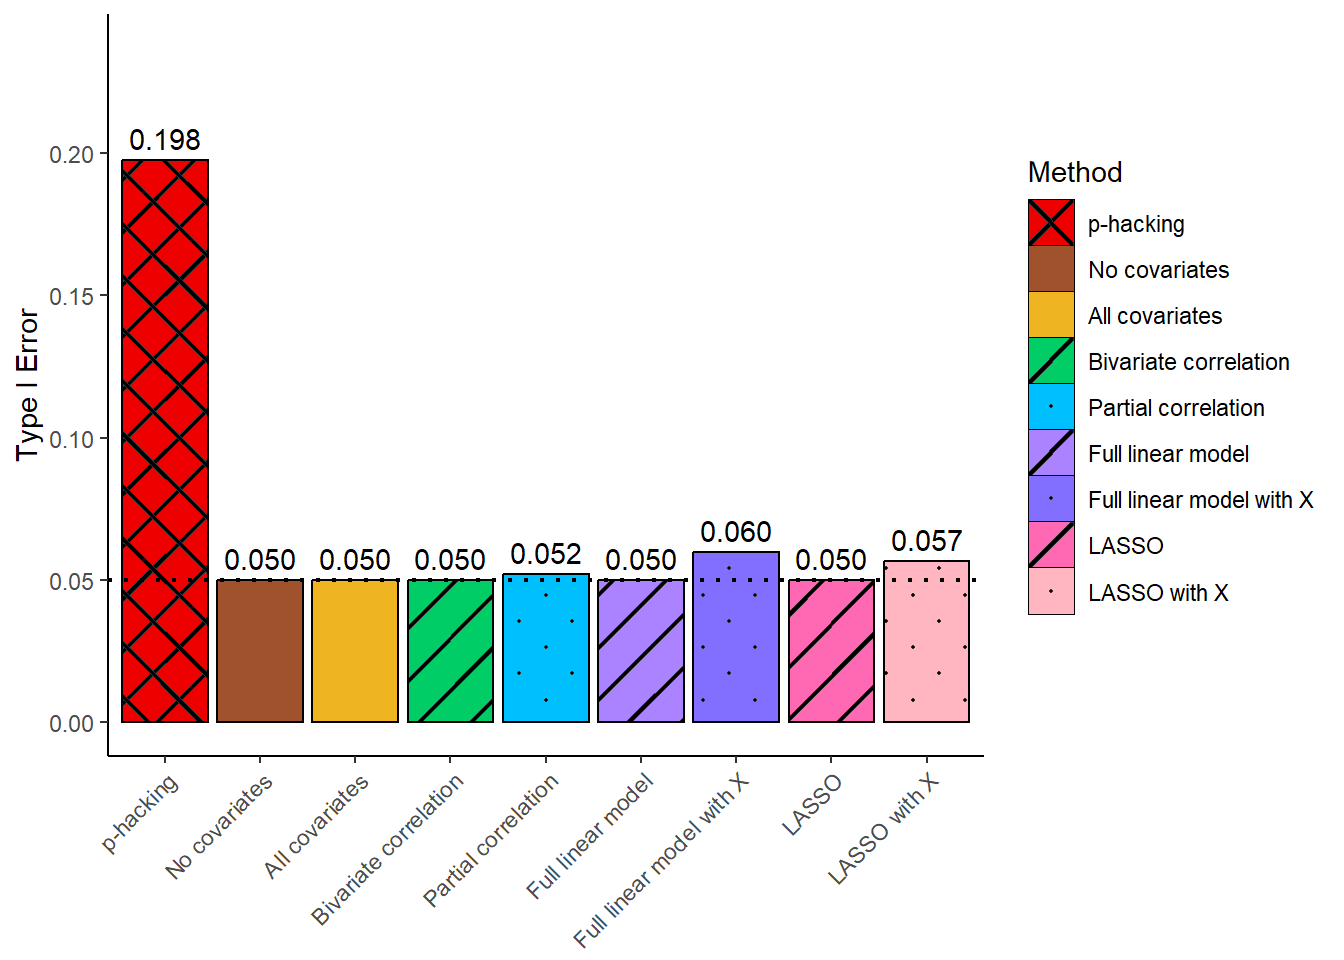

In [ ]:

type_I_summary <- d_0 |>
  group_by(method) |>
  summarise(type_I = mean(p_value < 0.05))

type_I_summary |>
  mutate(method = fct_relevel(method, "p-hacking")) |>
  ggplot(aes(x = method, y = type_I, fill = method, pattern = method)) +
  geom_bar_pattern(
    stat = "identity",
    pattern_fill = "black",
    pattern_angle = 45,
    pattern_density = 0.1,
    pattern_size = .1,
    pattern_spacing = 0.05,
    color = "black") +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black", linewidth = .8) +
  geom_text(aes(label = sprintf("%.3f", type_I)), vjust = -0.5) +
  labs(x = NULL,
       y = "Type I Error",
       fill = "Method",
       pattern = "Method") +
  scale_y_continuous(limits = c(0, max(type_I_summary$type_I) * 1.2), 
                     breaks = seq(0, max(type_I_summary$type_I) * 1.2, by = 0.05)) +
  scale_pattern_manual(values = method_patterns) +
  scale_fill_manual(values = method_colors) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
observations <- d_0 |> 
  group_by(method, n_obs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, .25, .30),
                     limits = c(0.03, .30)) +
  labs(x = NULL,
       subtitle = "Number of Observations",
       y = "Type I Error") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())


covs <- d_0 |> 
  group_by(method, n_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25, .30),
                     limits = c(.03, .30)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Number of Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

good_covs <- d_0 |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, .25, .30), 
                     limits = c(.03, .30)) +
  labs(y = "Type I Error",
       x = NULL,
       subtitle = "Proportion of Good Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

ycor <- d_0 |> 
  group_by(method, r_ycov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25, 0.30), 
                     limits = c(.03, .30)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Y-Covariate Correlation Strength") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())


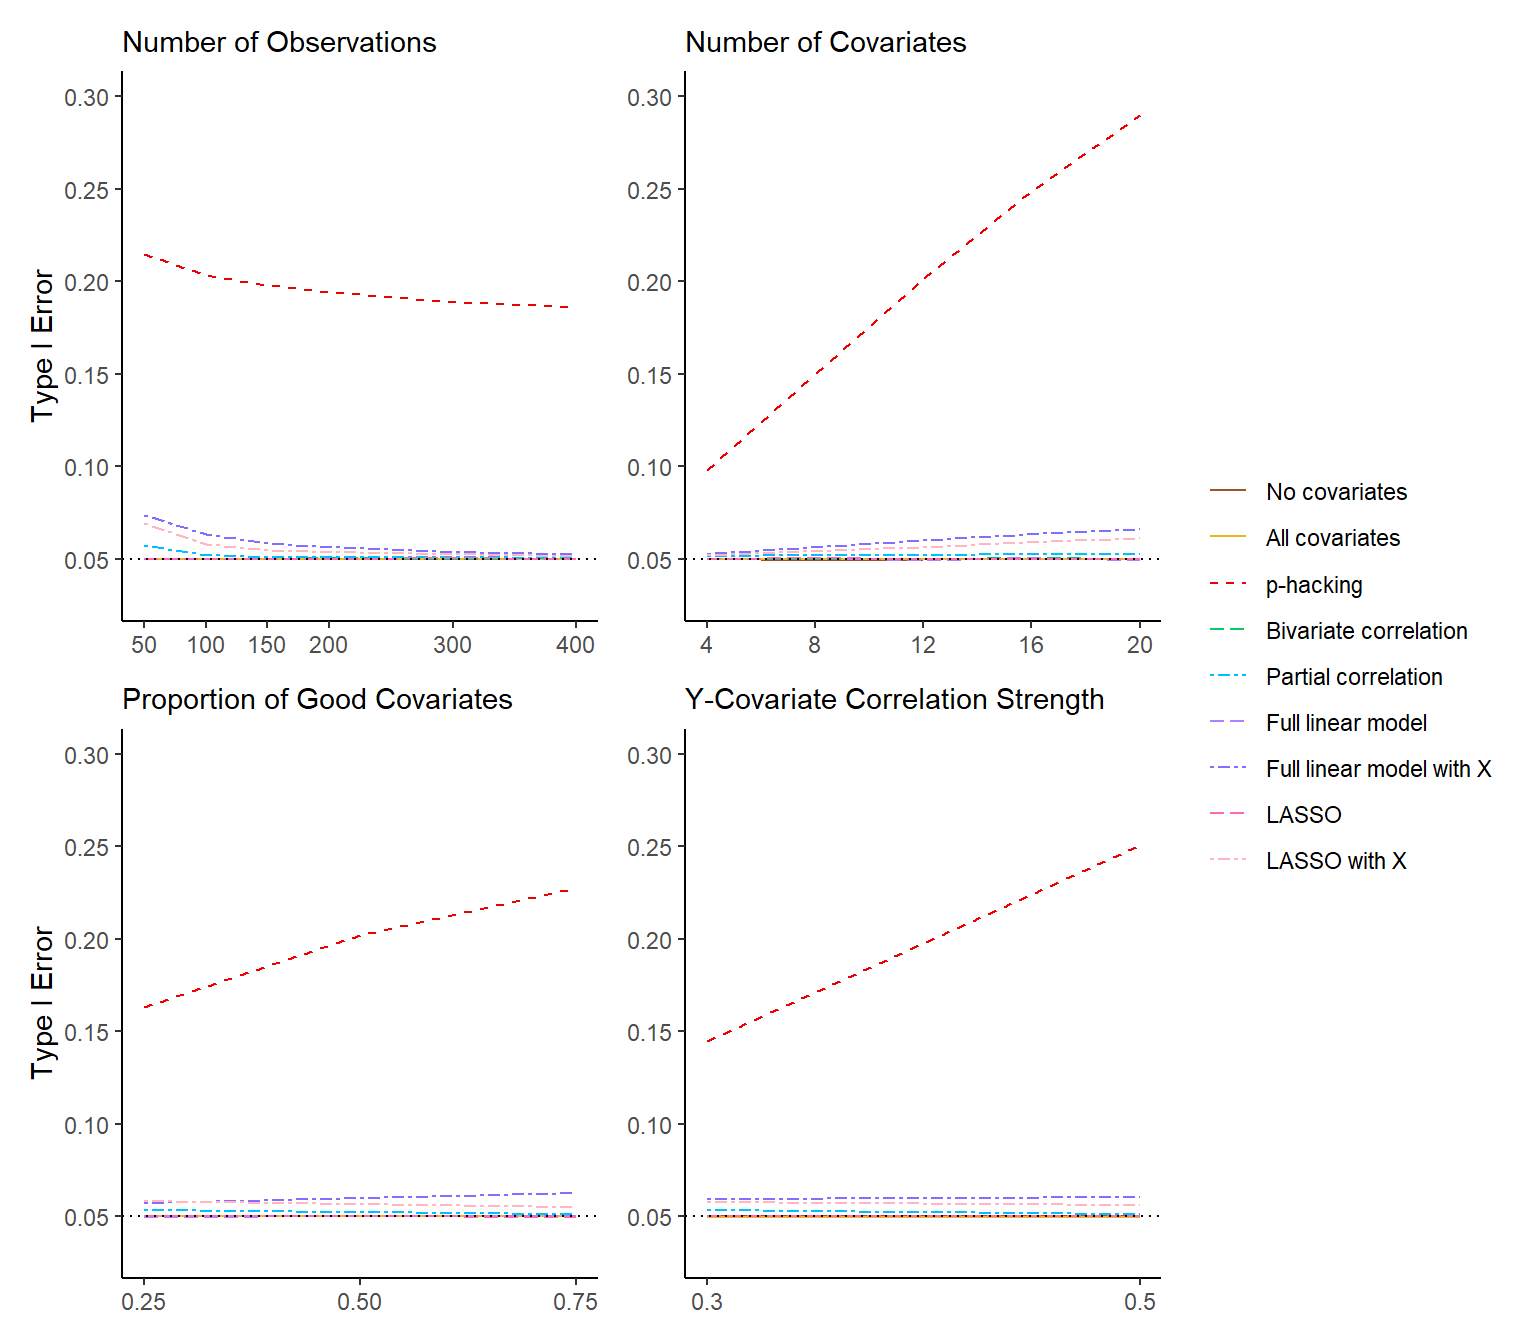

In [ ]:

(observations + covs)/(good_covs + ycor) +
  plot_layout(guides = "collect") &
  theme(legend.position = "right")


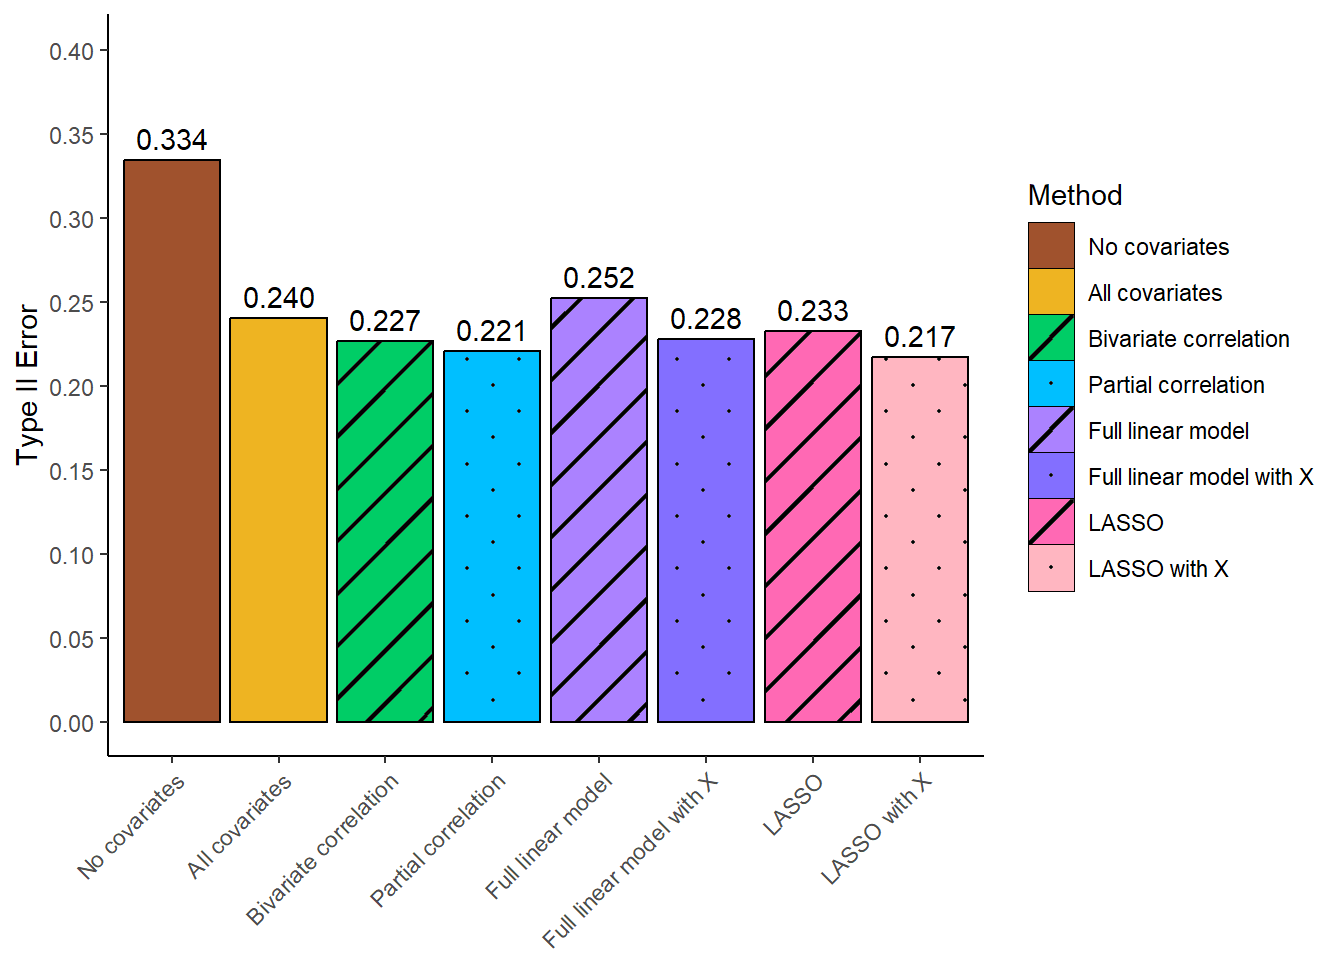

In [ ]:

d_all <- d_03 |>
  bind_rows(d_05) |> 
  filter(method != "p-hacking")

type_II_summary <- d_all |> 
  group_by(method) |>
  summarise(type_II = mean(p_value >= 0.05))

type_II_summary |> 
  ggplot(aes(x = method, y = type_II, fill = method, pattern = method)) +
  geom_bar_pattern(
    stat = "identity",
    pattern_fill = "black",
    pattern_angle = 45,
    pattern_density = 0.1,
    pattern_size = .1,
    pattern_spacing = 0.05,
    color = "black") +
  geom_text(aes(label = sprintf("%.3f", type_II)), vjust = -0.5) +
  labs(x = NULL,
       y = "Type II Error",
       fill = "Method",
       pattern = "Method") +
  scale_y_continuous(limits = c(0, max(type_II_summary$type_II) * 1.2), 
                     breaks = seq(0, max(type_II_summary$type_II) * 1.2, by = 0.05)) +
  scale_pattern_manual(values = method_patterns) +
  scale_fill_manual(values = method_colors) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
observations_2 <- d_all |> 
  group_by(method, n_obs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = "Type II Error",
       subtitle = "Number of Observations",
       x = NULL) +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

covs_2 <- d_all |> 
  group_by(method, n_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Number of Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

good_covs_2 <- d_all |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = "Type II Error",
       x = NULL,
       subtitle = "Proportion of Good Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

ycor_2 <- d_all |> 
  group_by(method, r_ycov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Y-Covariate Correlation Strength") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

b_x <- d_all |> 
  group_by(method, b_x) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = b_x, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = "Type II Error",
       x = NULL,
       subtitle = "Population Parameter for X") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())


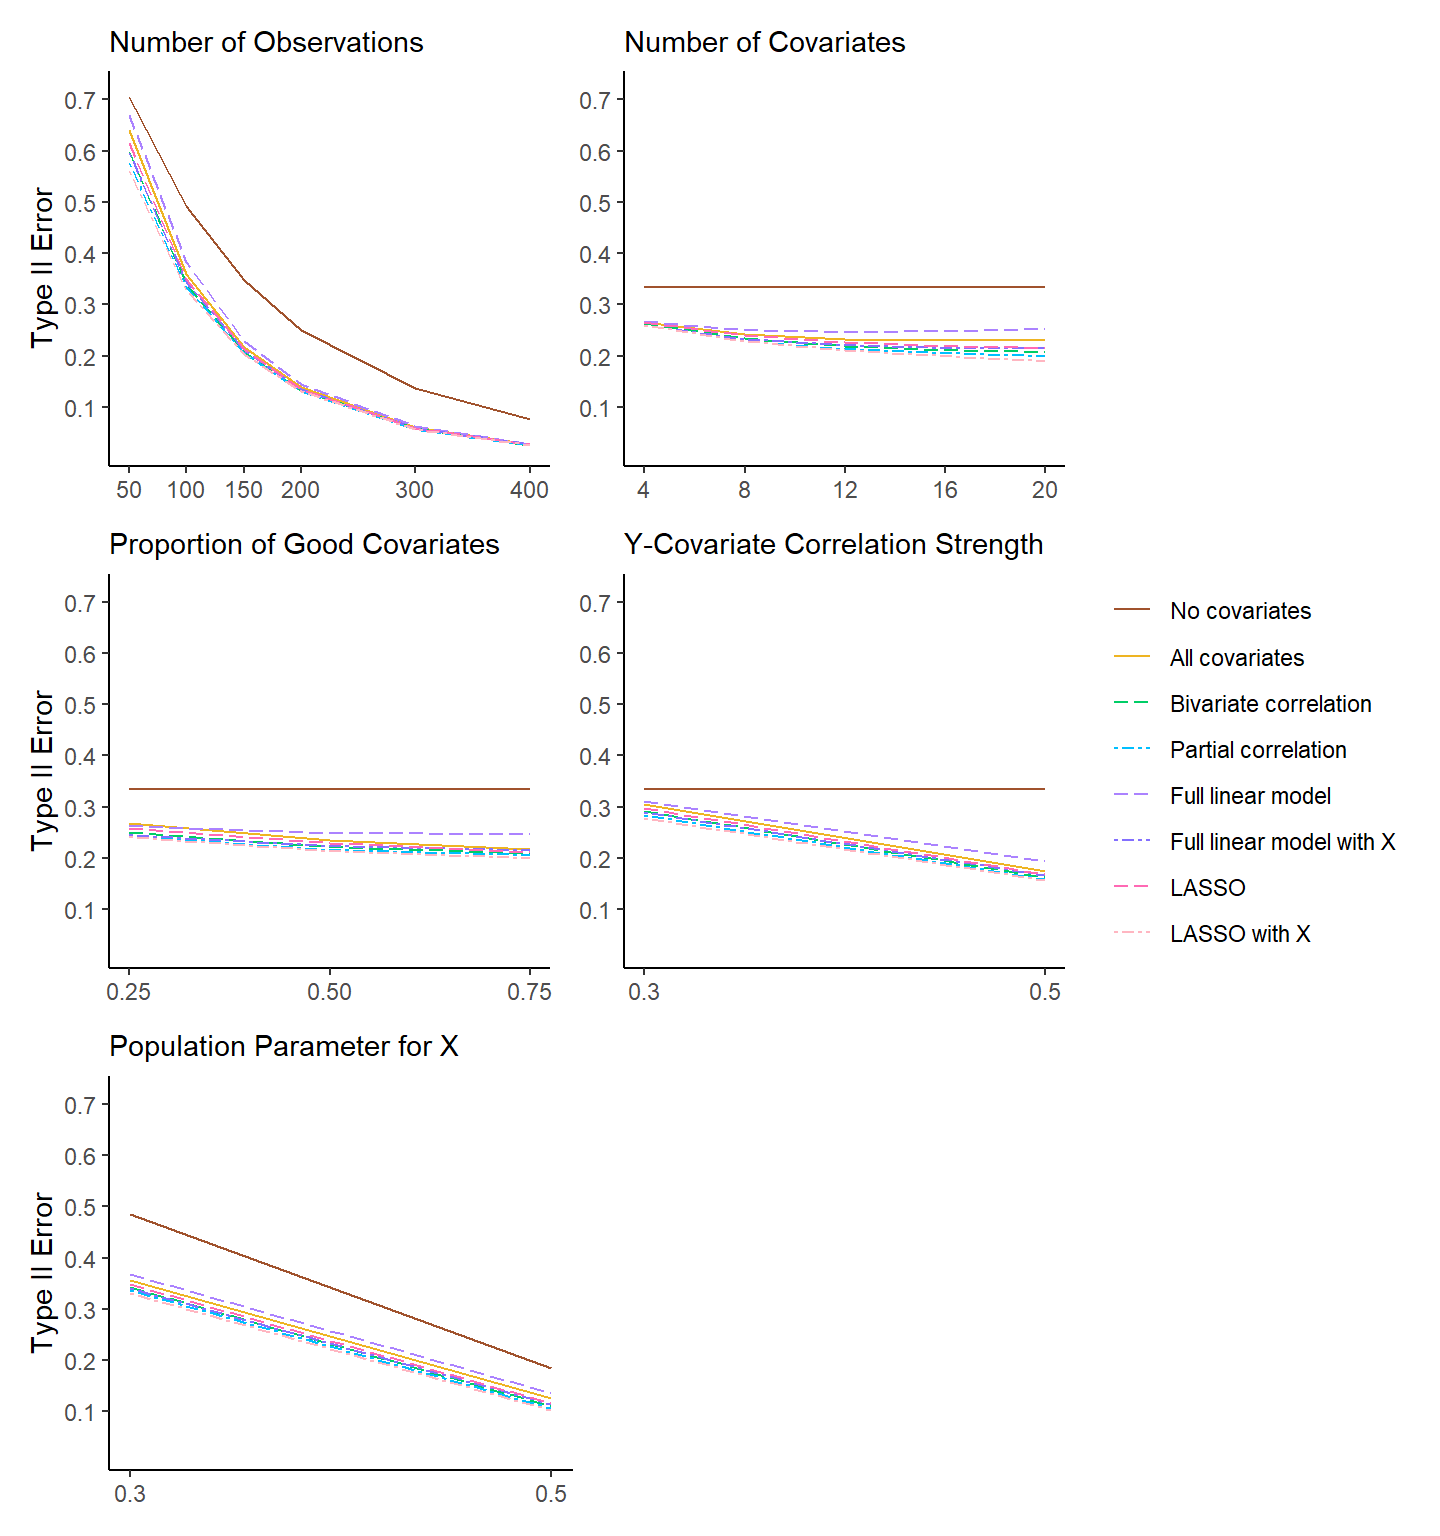

In [ ]:

(observations_2 + covs_2)/(good_covs_2 + ycor_2)/(b_x + plot_spacer()) +
  plot_layout(guides = "collect") &
  theme(legend.position = "right")


In [ ]:
rm(d_all)


(`stat_density()`).

(`stat_density()`).

(`stat_density()`).

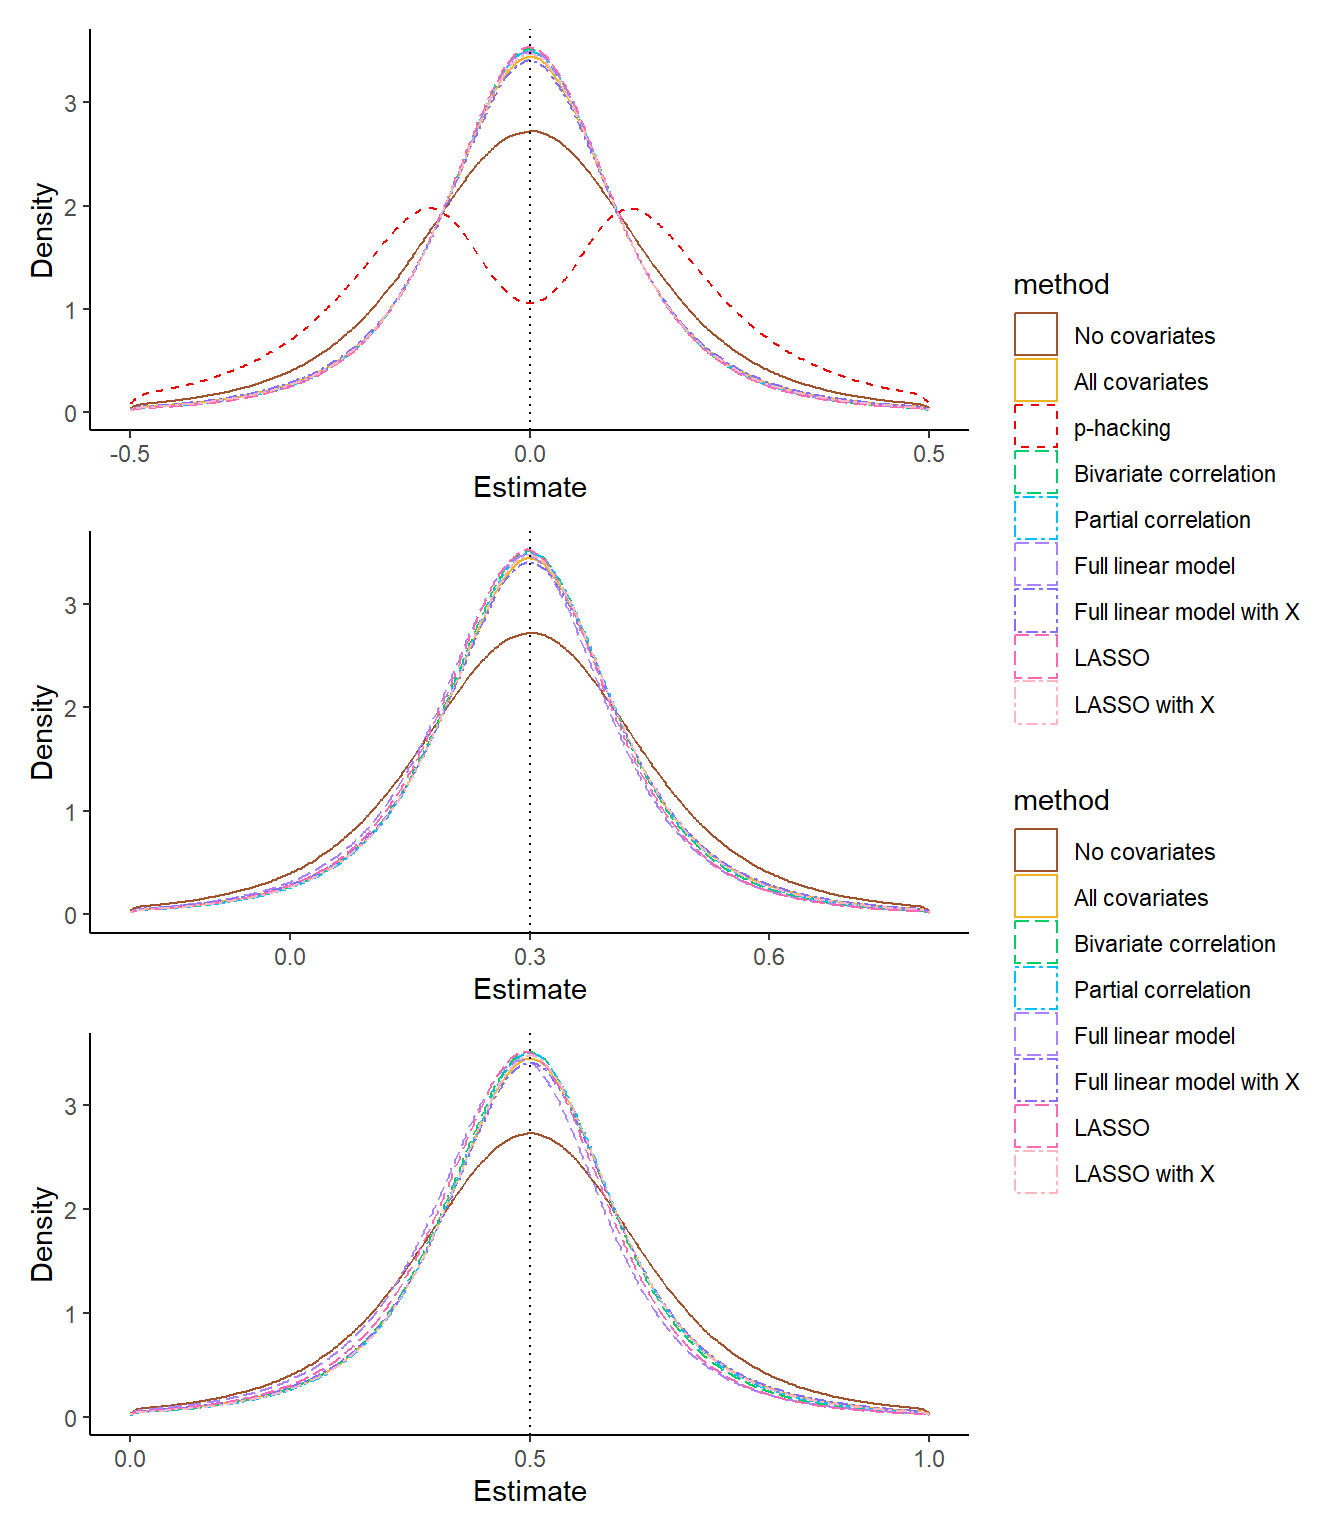

In [ ]:

est_d_0 <- d_0 |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  scale_x_continuous(limits = c(-0.5, 0.5), breaks = seq(-0.5, 0.5, by = 0.5)) +
  labs(y = "Density",
       x = "Estimate") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) 

est_d_03 <- d_03 |> 
  filter(method != "p-hacking") |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0.3, linetype = "dotted") +
  scale_x_continuous(limits = c(-0.2, 0.8), breaks = c(0, 0.3, 0.6)) +
  labs(y = "Density",
       x = "Estimate") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.position = "none")

est_d_05 <- d_05 |> 
  filter(method != "p-hacking") |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0.5, linetype = "dotted") +
  scale_x_continuous(limits = c(0, 1), breaks = c(0, 0.5, 1)) +
  labs(y = "Density",
       x = "Estimate") + 
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  theme(legend.position = "none")

est_d_0 / est_d_03 / est_d_05 +
  plot_layout(guides = "collect") &
  theme(legend.position = "right")
